<a href="https://colab.research.google.com/github/Abhishekkumar1108/ecommerce-customer-churn-analysis/blob/main/E_commerce_Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# STEP 1: LOAD AND INSPECT DATA

In [176]:
# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("-"*80)
print("E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS")
print("-"*80)


# Load the dataset
df = pd.read_csv('ecommerce_customer_data.csv')

# Display basic information
print(f"Dataset loaded successfully")
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nData Types:")
print(df.dtypes)

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nFirst 5 Rows:")
print(df.head())

print(f"\nBasic Statistics:")
print(df.describe())


--------------------------------------------------------------------------------
E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS
--------------------------------------------------------------------------------
Dataset loaded successfully

Dataset Shape: 5000 rows × 14 columns

Column Names:
  1. customer_id
  2. customer_type
  3. tenure_months
  4. avg_order_value
  5. purchase_frequency
  6. category
  7. days_since_last_purchase
  8. churned
  9. total_spend
  10. avg_days_between_purchase
  11. tenure_band
  12. frequency_bucket
  13. order_value_segment
  14. rfm_segment

Data Types:
customer_id                    int64
customer_type                 object
tenure_months                  int64
avg_order_value              float64
purchase_frequency             int64
category                      object
days_since_last_purchase       int64
churned                        int64
total_spend                  float64
avg_days_between_purchase    float64
tenure_band                   object
frequen

# STEP 2: CALCULATE KEY METRICS

In [177]:
print("-" * 80)
print(" Calculating Key Performance Metrics.")
print("-" * 80)

# Overall metrics
total_customers = len(df)
churned_customers = df['churned'].sum()
active_customers = total_customers - churned_customers
churn_rate = (churned_customers / total_customers) * 100
retention_rate = 100 - churn_rate

# Financial metrics
total_revenue = df['total_spend'].sum()
avg_customer_value = df['total_spend'].mean()
avg_order_value = df['avg_order_value'].mean()
median_order_value = df['avg_order_value'].median()

# Behavioral metrics
avg_tenure = df['tenure_months'].mean()
avg_purchase_freq = df['purchase_frequency'].mean()
avg_days_since_purchase = df['days_since_last_purchase'].mean()

print(f"\n OVERALL BUSINESS METRICS")
print(f"{'─' * 80}")
print(f"Total Customers:              {total_customers:,}")
print(f"Active Customers:             {active_customers:,} ({retention_rate:.1f}%)")
print(f"Churned Customers:            {churned_customers:,} ({churn_rate:.1f}%)")
print(f"\n REVENUE METRICS")
print(f"{'─' * 80}")
print(f"Total Revenue:                ${total_revenue:,.2f}")
print(f"Average Customer Lifetime:    ${avg_customer_value:.2f}")
print(f"Average Order Value:          ${avg_order_value:.2f}")
print(f"Median Order Value:           ${median_order_value:.2f}")
print(f"\n BEHAVIORAL METRICS")
print(f"{'─' * 80}")
print(f"Average Tenure:               {avg_tenure:.1f} months")
print(f"Average Purchase Frequency:   {avg_purchase_freq:.1f} orders")
print(f"Avg Days Since Last Purchase: {avg_days_since_purchase:.1f} days")


--------------------------------------------------------------------------------
 Calculating Key Performance Metrics.
--------------------------------------------------------------------------------

 OVERALL BUSINESS METRICS
────────────────────────────────────────────────────────────────────────────────
Total Customers:              5,000
Active Customers:             3,591 (71.8%)
Churned Customers:            1,409 (28.2%)

 REVENUE METRICS
────────────────────────────────────────────────────────────────────────────────
Total Revenue:                $4,896,182.25
Average Customer Lifetime:    $979.24
Average Order Value:          $153.09
Median Order Value:           $141.36

 BEHAVIORAL METRICS
────────────────────────────────────────────────────────────────────────────────
Average Tenure:               9.9 months
Average Purchase Frequency:   5.2 orders
Avg Days Since Last Purchase: 40.7 days


# STEP 3: CHURN ANALYSIS

In [178]:
print("-" * 80)
print(" Performing Churn Analysis")
print("-" * 80)

# Churn by customer type
print(f"\nCHURN ANALYSIS BY CUSTOMER TYPE")
print(f"{'─' * 80}")
churn_by_type = df.groupby('customer_type').agg({
    'churned': ['sum', 'mean', 'count']
}).round(4)
churn_by_type.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_type['Churn_Rate'] = (churn_by_type['Churn_Rate'] * 100).round(1)
churn_by_type['Active_Customers'] = churn_by_type['Total_Customers'] - churn_by_type['Churned_Count']
print(churn_by_type)

# Churn by tenure band
print(f"\nCHURN ANALYSIS BY TENURE BAND")
print(f"{'─' * 80}")
churn_by_tenure = df.groupby('tenure_band').agg({
    'churned': ['sum', 'mean', 'count']
}).round(4)
churn_by_tenure.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_tenure['Churn_Rate'] = (churn_by_tenure['Churn_Rate'] * 100).round(1)
print(churn_by_tenure)

# Churn by frequency bucket
print(f"\nCHURN ANALYSIS BY PURCHASE FREQUENCY")
print(f"{'─' * 80}")
churn_by_freq = df.groupby('frequency_bucket').agg({
    'churned': ['sum', 'mean', 'count']
}).round(4)
churn_by_freq.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_freq['Churn_Rate'] = (churn_by_freq['Churn_Rate'] * 100).round(1)
print(churn_by_freq)

# Churn by category
print(f"\nCHURN ANALYSIS BY PRODUCT CATEGORY")
print(f"{'─' * 80}")
churn_by_category = df.groupby('category').agg({
    'churned': ['sum', 'mean'],
    'total_spend': 'sum',
    'customer_id': 'count'
}).round(2)
churn_by_category.columns = ['Churned_Count', 'Churn_Rate', 'Total_Revenue', 'Total_Customers']
churn_by_category['Churn_Rate'] = (churn_by_category['Churn_Rate'] * 100).round(1)
churn_by_category['Avg_Customer_Value'] = (churn_by_category['Total_Revenue'] /
                                            churn_by_category['Total_Customers']).round(2)
print(churn_by_category.sort_values('Churn_Rate', ascending=False))


--------------------------------------------------------------------------------
 Performing Churn Analysis
--------------------------------------------------------------------------------

CHURN ANALYSIS BY CUSTOMER TYPE
────────────────────────────────────────────────────────────────────────────────
               Churned_Count  Churn_Rate  Total_Customers  Active_Customers
customer_type                                                              
Loyal                    146        11.3             1295              1149
New                      759        43.9             1729               970
Returning                504        25.5             1976              1472

CHURN ANALYSIS BY TENURE BAND
────────────────────────────────────────────────────────────────────────────────
              Churned_Count  Churn_Rate  Total_Customers
tenure_band                                             
0-3 months              801        41.8             1916
12-24 months             57       

# STEP 4: RFM SEGMENTATION ANALYSIS

In [179]:
print("-" * 80)
print("[STEP 4/6] Analyzing RFM Customer Segments...")
print("-" * 80)

rfm_analysis = df.groupby('rfm_segment').agg({
    'customer_id': 'count',
    'churned': ['sum', 'mean'],
    'total_spend': ['sum', 'mean'],
    'purchase_frequency': 'mean',
    'days_since_last_purchase': 'mean'
}).round(2)

rfm_analysis.columns = ['Customer_Count', 'Churned_Count', 'Churn_Rate',
                        'Total_Revenue', 'Avg_Customer_Value',
                        'Avg_Purchase_Freq', 'Avg_Days_Since_Purchase']
rfm_analysis['Churn_Rate'] = (rfm_analysis['Churn_Rate'] * 100).round(1)
rfm_analysis['Revenue_Percentage'] = ((rfm_analysis['Total_Revenue'] /
                                        total_revenue) * 100).round(1)

print(f"\n RFM SEGMENT PERFORMANCE")
print(f"{'─' * 80}")
print(rfm_analysis.sort_values('Total_Revenue', ascending=False))

# Identify high-value segments
champions = df[df['rfm_segment'] == 'Champions']
at_risk = df[df['rfm_segment'] == 'At Risk']

print(f"\n HIGH-VALUE SEGMENT: Champions")
print(f"{'─' * 80}")
print(f"Total Customers:        {len(champions):,}")
print(f"Total Revenue:          ${champions['total_spend'].sum():,.2f}")
print(f"Avg Customer Value:     ${champions['total_spend'].mean():.2f}")
print(f"Churn Rate:             {(champions['churned'].mean() * 100):.1f}%")
print(f"Revenue Contribution:   {(champions['total_spend'].sum() / total_revenue * 100):.1f}%")

print(f"\n AT-RISK SEGMENT: Immediate Attention Required")
print(f"{'─' * 80}")
print(f"Total Customers:        {len(at_risk):,}")
print(f"Potential Revenue Loss: ${at_risk['total_spend'].sum():,.2f}")
print(f"Churn Rate:             {(at_risk['churned'].mean() * 100):.1f}%")
print(f"Avg Days Inactive:      {at_risk['days_since_last_purchase'].mean():.1f} days")


--------------------------------------------------------------------------------
[STEP 4/6] Analyzing RFM Customer Segments...
--------------------------------------------------------------------------------

 RFM SEGMENT PERFORMANCE
────────────────────────────────────────────────────────────────────────────────
                     Customer_Count  Churned_Count  Churn_Rate  Total_Revenue  \
rfm_segment                                                                     
Champions                      1703              0         0.0     3509525.57   
Big Spenders                    444            444       100.0      620356.24   
Loyal Customers                 631              0         0.0      346462.86   
Need Attention                 1058            579        55.0      195481.52   
Potential Loyalists             780              2         0.0      185989.22   
At Risk                         384            384       100.0       38366.84   

                     Avg_Customer_Va

#STEP 5: VISUALIZATION
#E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS DASHBOARD

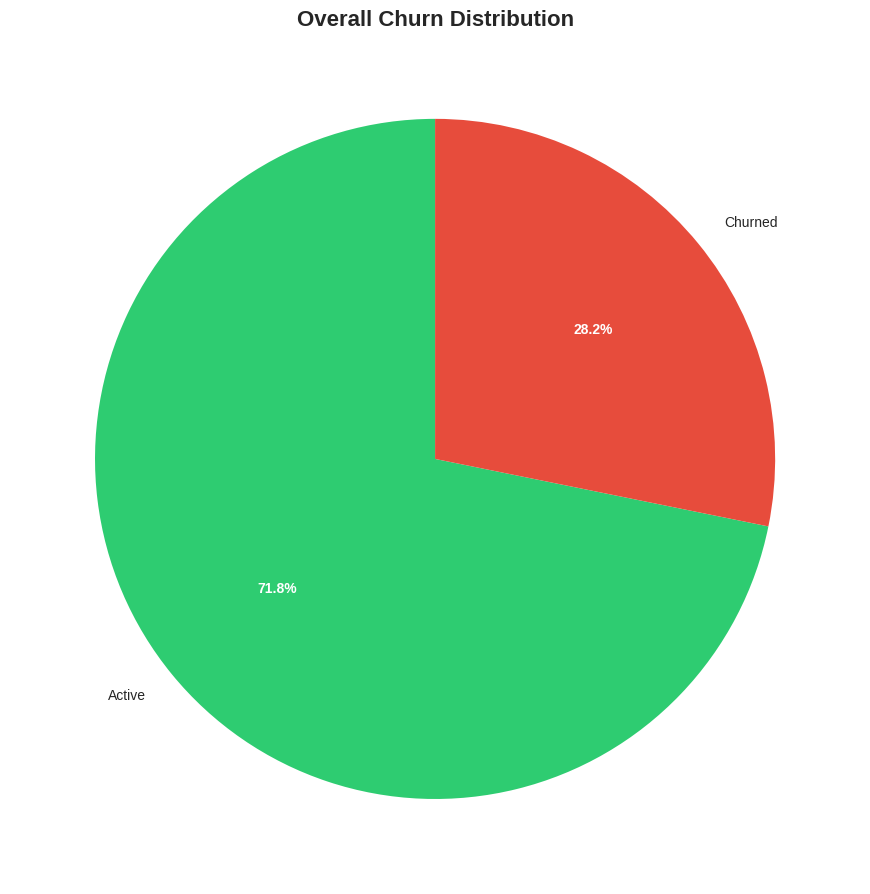

In [ ]:
# Chart 1: Overall Churn Distribution
fig = plt.figure(figsize=(35, 35))
ax1 = plt.subplot(4, 3, 1)
churn_counts = df['churned'].value_counts()
colors_pie = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = ax1.pie(churn_counts, labels=['Active', 'Churned'],
                                     autopct='%1.1f%%', colors=colors_pie,
                                     startangle=90, textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax1.set_title('Overall Churn Distribution', fontsize=16, fontweight='bold', pad=10)
plt.title('Overall Churn Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


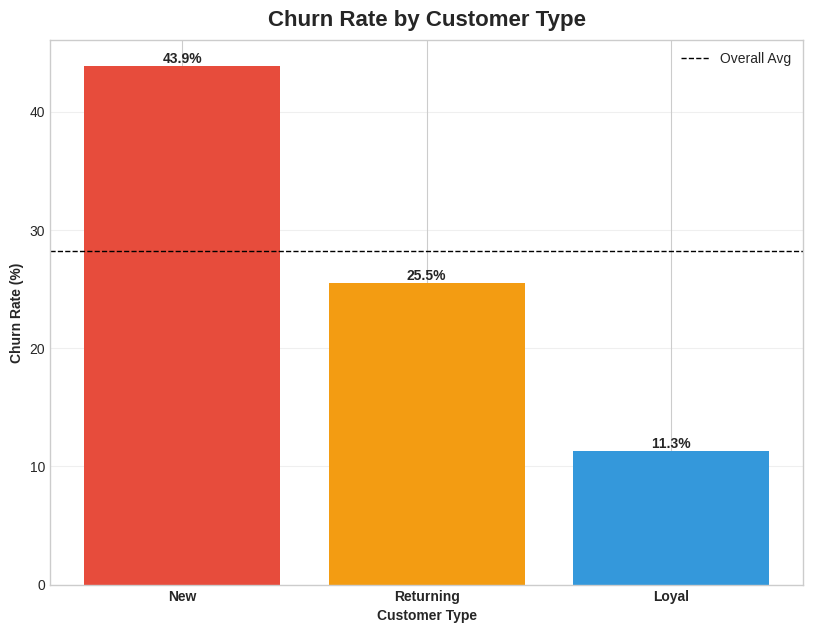

In [ ]:
# Chart 2: Churn by Customer Type
plt.figure(figsize=(24, 24))
ax2 = plt.subplot(4, 3, 2)
# Sort churn rate by customer type
churn_type_plot = churn_by_type.sort_values('Churn_Rate', ascending=False)
# Bar plot
bars = ax2.bar(
    range(len(churn_type_plot)),
    churn_type_plot['Churn_Rate'],
    color=['#e74c3c', '#f39c12', '#3498db'])
# X-axis ticks and labels
ax2.set_xticks(range(len(churn_type_plot)))
ax2.set_xticklabels(churn_type_plot.index, rotation=0, fontweight='bold')
ax2.set_xlabel('Customer Type', fontweight='bold')
# Y-axis label
ax2.set_ylabel('Churn Rate (%)', fontweight='bold')
# Title
ax2.set_title('Churn Rate by Customer Type', fontsize=16, fontweight='bold', pad=10)
# Overall churn reference line
ax2.axhline(
    y=churn_rate,
    color='black',
    linestyle='--',
    linewidth=1,
    label='Overall Avg')
# Legend and grid
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
# Data labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold')
plt.tight_layout()
plt.show()


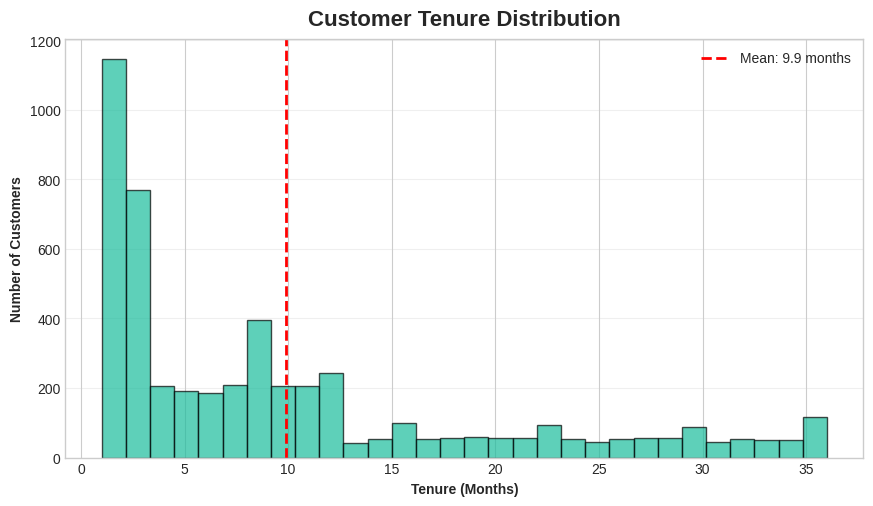

In [122]:
# Chart 3: Customer Distribution by Tenure
plt.figure(figsize=(35, 25))
ax3 = plt.subplot(4, 3, 3)
df['tenure_months'].hist(bins=30, color='#1abc9c', edgecolor='black', alpha=0.7, ax=ax3)
ax3.axvline(df['tenure_months'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {df["tenure_months"].mean():.1f} months')
ax3.set_xlabel('Tenure (Months)', fontweight='bold')
ax3.set_ylabel('Number of Customers', fontweight='bold')
ax3.set_title('Customer Tenure Distribution', fontsize=16, fontweight='bold', pad=10)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

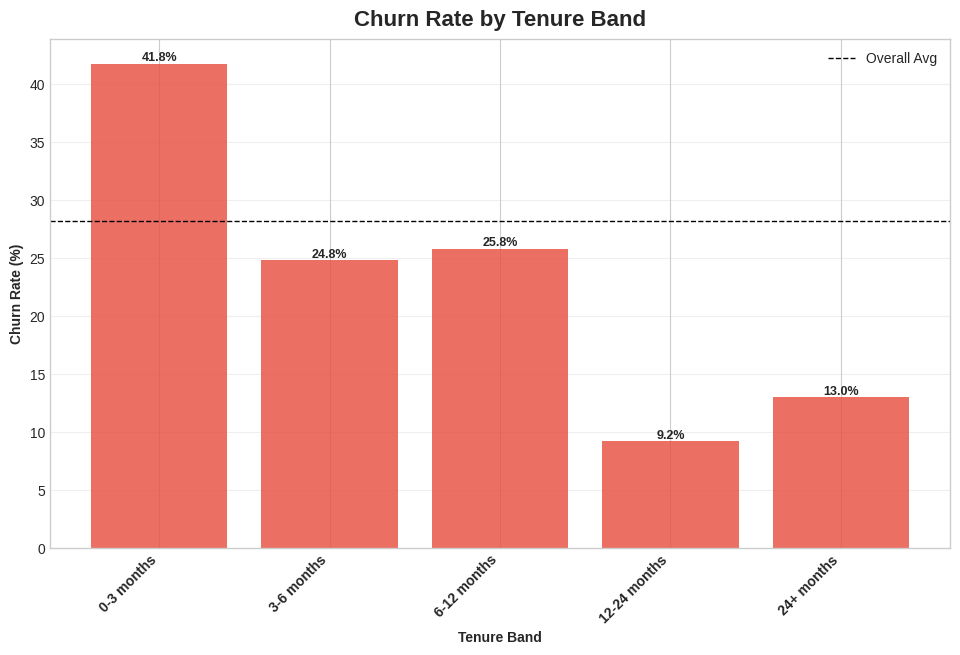

In [123]:
# Chart 4: Churn Rate by Tenure Band
plt.figure(figsize=(28, 24))
ax4 = plt.subplot(4, 3, 4)
# Correct order of tenure bands
tenure_order = ['0-3 months', '3-6 months', '6-12 months', '12-24 months', '24+ months']
churn_tenure_plot = churn_by_tenure.reindex(tenure_order)
# Bar plot
bars = ax4.bar(
    range(len(churn_tenure_plot)),
    churn_tenure_plot['Churn_Rate'],
    color='#e74c3c',
    alpha=0.8)
# X-axis ticks and labels
ax4.set_xticks(range(len(churn_tenure_plot)))
ax4.set_xticklabels(churn_tenure_plot.index, rotation=45, ha='right', fontweight='bold')
ax4.set_xlabel('Tenure Band', fontweight='bold')
# Y-axis label
ax4.set_ylabel('Churn Rate (%)', fontweight='bold')
# Title
ax4.set_title('Churn Rate by Tenure Band', fontsize=16, fontweight='bold', pad=10)
# Overall churn reference line
ax4.axhline(
    y=churn_rate,
    color='black',
    linestyle='--',
    linewidth=1,
    label='Overall Avg')
# Legend and grid
ax4.legend()
ax4.grid(axis='y', alpha=0.3)
# Value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=9)
plt.tight_layout()
plt.show()


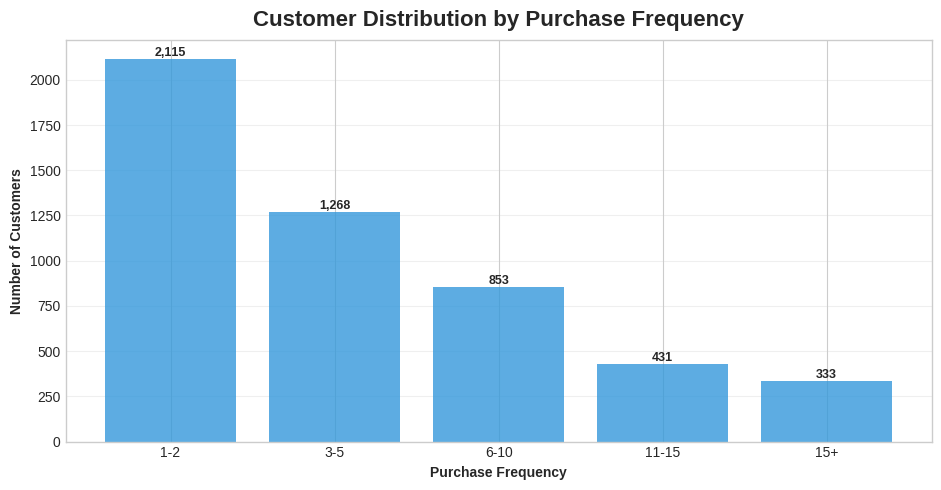

In [124]:
# Chart 5: Purchase Frequency Distribution
plt.figure(figsize=(38, 24))
ax5 = plt.subplot(4, 3, 5)
freq_order = ['1-2', '3-5', '6-10', '11-15', '15+']
freq_counts = df.groupby('frequency_bucket').size().reindex(freq_order)
bars = ax5.bar(range(len(freq_counts)), freq_counts, color='#3498db', alpha=0.8)
ax5.set_xticks(range(len(freq_counts)))
ax5.set_xticklabels(freq_counts.index, rotation=0)
ax5.set_ylabel('Number of Customers', fontweight='bold')
ax5.set_xlabel('Purchase Frequency', fontweight='bold')
ax5.set_title('Customer Distribution by Purchase Frequency', fontsize=16, fontweight='bold', pad=10)
ax5.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)


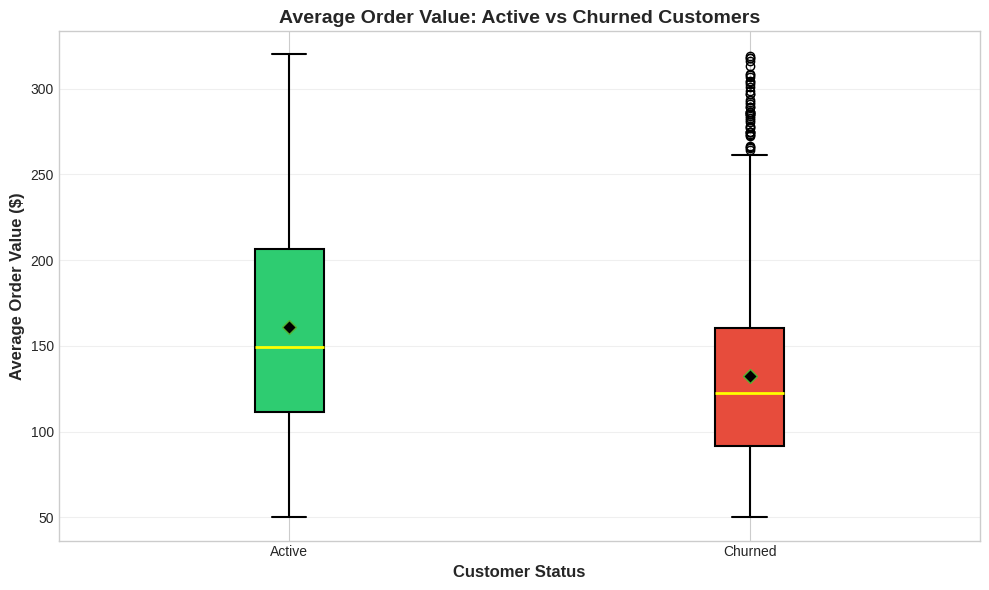

In [ ]:
# Chart 6: Average Order Value – Active vs Churned (Clear Version)
plt.figure(figsize=(10, 6))
active_orders = df[df['churned'] == 0]['avg_order_value']
churned_orders = df[df['churned'] == 1]['avg_order_value']
data = [active_orders, churned_orders]
bp = plt.boxplot(
    data,
    labels=['Active', 'Churned'],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='black', markersize=7),
    medianprops=dict(color='yellow', linewidth=2),
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5))
# Colors
bp['boxes'][0].set_facecolor('#2ecc71')  # Active
bp['boxes'][1].set_facecolor('#e74c3c')  # Churned
# Labels & title
plt.ylabel('Average Order Value ($)', fontsize=12, fontweight='bold')
plt.xlabel('Customer Status', fontsize=12, fontweight='bold')
plt.title('Average Order Value: Active vs Churned Customers',
          fontsize=14, fontweight='bold')
# Grid
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


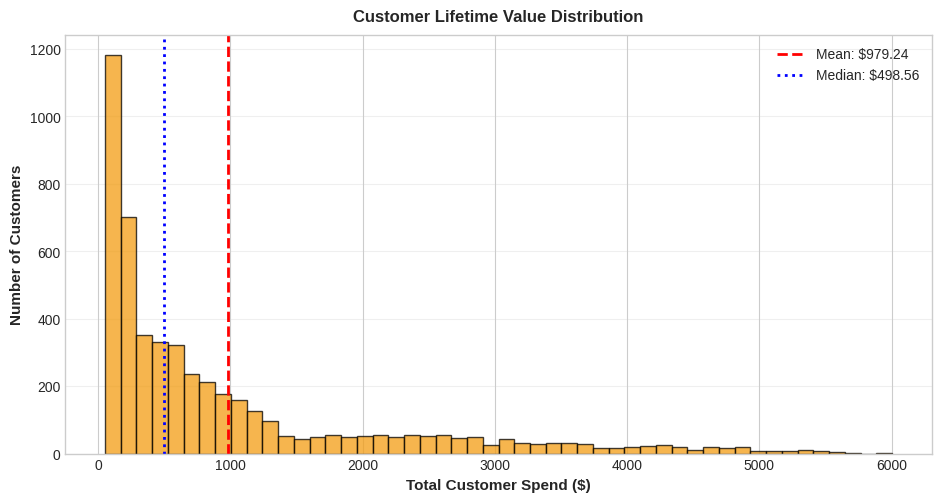

In [125]:
# Chart 7: Total Spend Distribution (Improved Clarity)
plt.figure(figsize=(38, 25))
ax7 = plt.subplot(4, 3, 7)
# Histogram
df['total_spend'].hist(
    bins=50,
    color='#f39c12',
    edgecolor='black',
    alpha=0.75,
    ax=ax7)
# Mean & Median
mean_spend = df['total_spend'].mean()
median_spend = df['total_spend'].median()
ax7.axvline(
    mean_spend,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mean: ${mean_spend:.2f}')
ax7.axvline(
    median_spend,
    color='blue',
    linestyle=':',
    linewidth=2,
    label=f'Median: ${median_spend:.2f}')
# Labels
ax7.set_xlabel('Total Customer Spend ($)', fontsize=11, fontweight='bold')
ax7.set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
# Title
ax7.set_title(
    'Customer Lifetime Value Distribution',
    fontsize=12,
    fontweight='bold',
    pad=10)
# Legend & grid
ax7.legend()
ax7.grid(axis='y', alpha=0.3)
# Improve tick readability
ax7.tick_params(axis='both', labelsize=10)


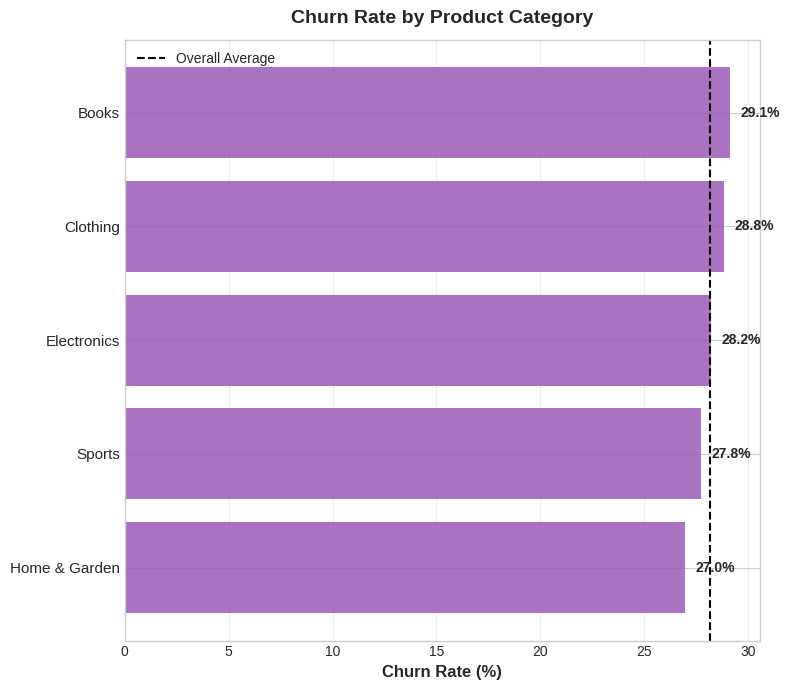

In [133]:
# Chart 8: Churn Rate by Category (Improved Visualization)
plt.figure(figsize=(8, 7))
ax8 = plt.subplot(1, 1, 1)
# Data
category_churn = (
    df.groupby('category')['churned']
    .mean()
    .sort_values(ascending=True) * 100)
# Horizontal bar chart
bars = ax8.barh(
    range(len(category_churn)),
    category_churn,
    color='#9b59b6',
    alpha=0.85)
# Y-axis
ax8.set_yticks(range(len(category_churn)))
ax8.set_yticklabels(category_churn.index, fontsize=11)
# X-axis
ax8.set_xlabel('Churn Rate (%)', fontsize=12, fontweight='bold')
# Title
ax8.set_title(
    'Churn Rate by Product Category',
    fontsize=14,
    fontweight='bold',
    pad=12)
# Overall churn reference line
ax8.axvline(
    x=churn_rate,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label='Overall Average')
# Grid & legend
ax8.grid(axis='x', alpha=0.3)
ax8.legend(fontsize=10)
# Value labels
for bar in bars:
    width = bar.get_width()
    ax8.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10,
        fontweight='bold')
plt.tight_layout()
plt.show()


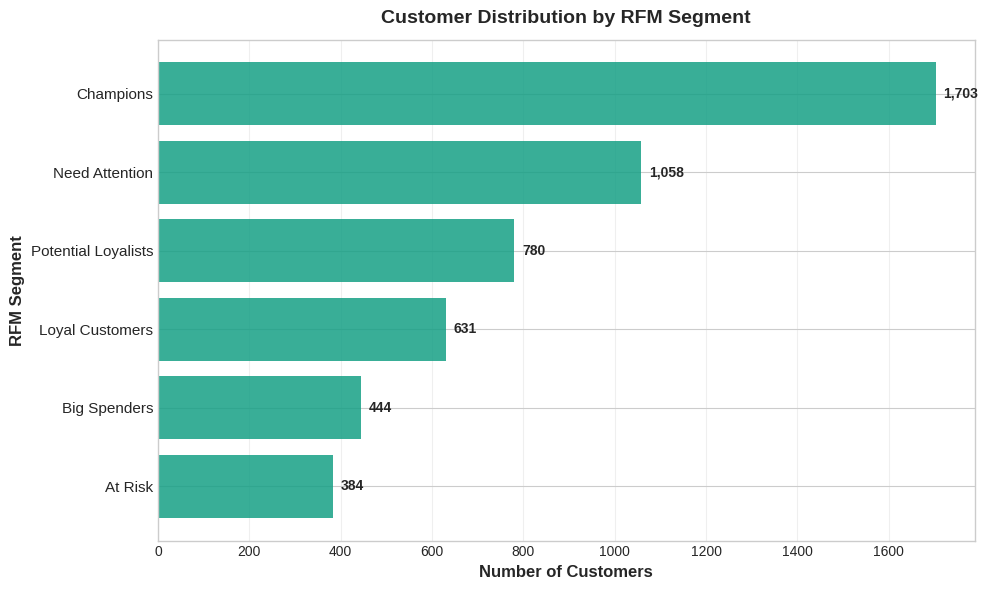

In [141]:
# Chart 9: RFM Segment Distribution (Improved Visualization)
plt.figure(figsize=(10, 6))
ax9 = plt.subplot(1, 1, 1)
# Data
rfm_counts = df['rfm_segment'].value_counts().sort_values(ascending=True)
# Horizontal bar plot
bars = ax9.barh(
    range(len(rfm_counts)),
    rfm_counts,
    color='#16a085',
    alpha=0.85)
# Y-axis
ax9.set_yticks(range(len(rfm_counts)))
ax9.set_yticklabels(rfm_counts.index, fontsize=11)
ax9.set_ylabel('RFM Segment', fontsize=12, fontweight='bold')
# X-axis
ax9.set_xlabel('Number of Customers', fontsize=12, fontweight='bold')
# Title
ax9.set_title(
    'Customer Distribution by RFM Segment',
    fontsize=14,
    fontweight='bold',
    pad=12)
# Grid
ax9.grid(axis='x', alpha=0.3)
# Value labels
for bar in bars:
    width = bar.get_width()
    ax9.text(
        width + (0.01 * rfm_counts.max()),
        bar.get_y() + bar.get_height() / 2,
        f'{int(width):,}',
        va='center',
        fontsize=10,
        fontweight='bold')
plt.tight_layout()
plt.show()

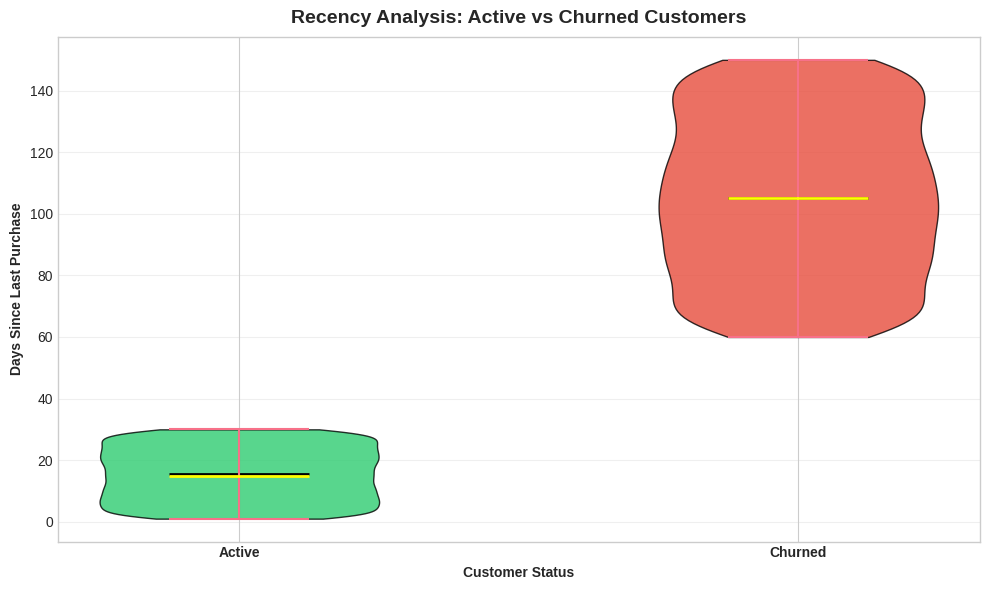

In [142]:
# Chart 10: Days Since Last Purchase – Violin Plot (Improved Clarity)
plt.figure(figsize=(10, 6))
ax10 = plt.subplot(1, 1, 1)
# Data
active_days = df[df['churned'] == 0]['days_since_last_purchase']
churned_days = df[df['churned'] == 1]['days_since_last_purchase']
# Violin plot
parts = ax10.violinplot(
    [active_days, churned_days],
    positions=[0, 1],
    showmeans=True,
    showmedians=True)
# Color violins
colors = ['#2ecc71', '#e74c3c']
for i, body in enumerate(parts['bodies']):
    body.set_facecolor(colors[i])
    body.set_edgecolor('black')
    body.set_alpha(0.8)
# Style mean & median
parts['cmeans'].set_color('black')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_color('yellow')
parts['cmedians'].set_linewidth(2)
# Axes labels
ax10.set_xticks([0, 1])
ax10.set_xticklabels(['Active', 'Churned'], fontweight='bold')
ax10.set_xlabel('Customer Status', fontweight='bold')
ax10.set_ylabel('Days Since Last Purchase', fontweight='bold')
# Title
ax10.set_title(
    'Recency Analysis: Active vs Churned Customers',
    fontsize=14,
    fontweight='bold',
    pad=10)
# Grid
ax10.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


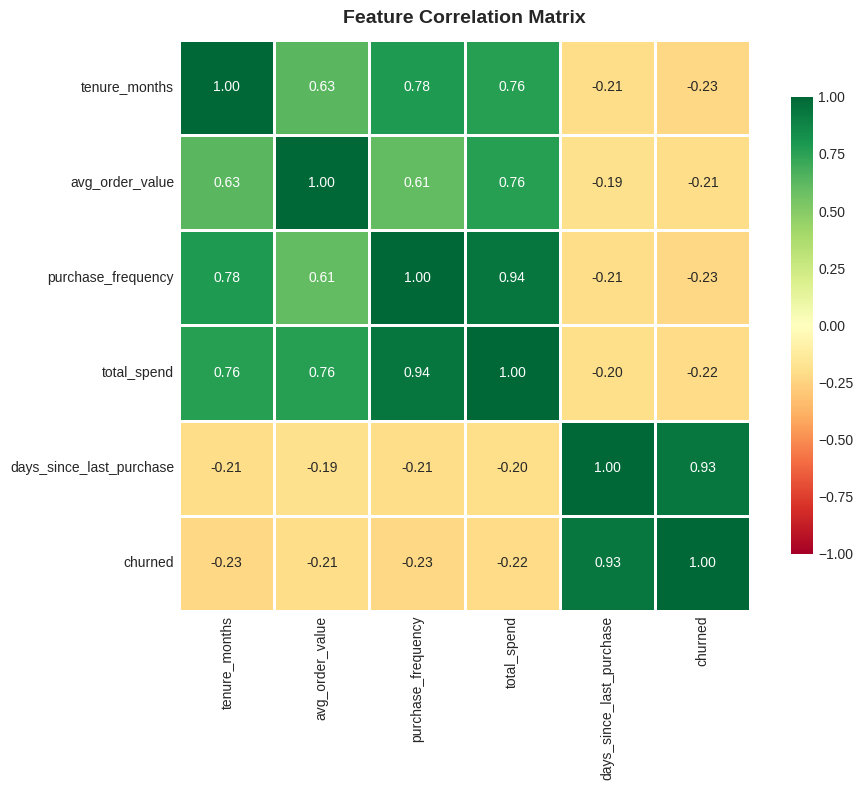

In [147]:
# Chart 11: Feature Correlation Heatmap (Improved Clarity)
plt.figure(figsize=(10, 8))
ax11 = plt.subplot(1, 1, 1)
corr_cols = [
    'tenure_months',
    'avg_order_value',
    'purchase_frequency',
    'total_spend',
    'days_since_last_purchase',
    'churned']
correlation = df[corr_cols].corr()
sns.heatmap(
    correlation,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',      # 🔴 bad → 🟡 average → 🟢 good
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10},
    ax=ax11)
ax11.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=12)
plt.tight_layout()
plt.show()


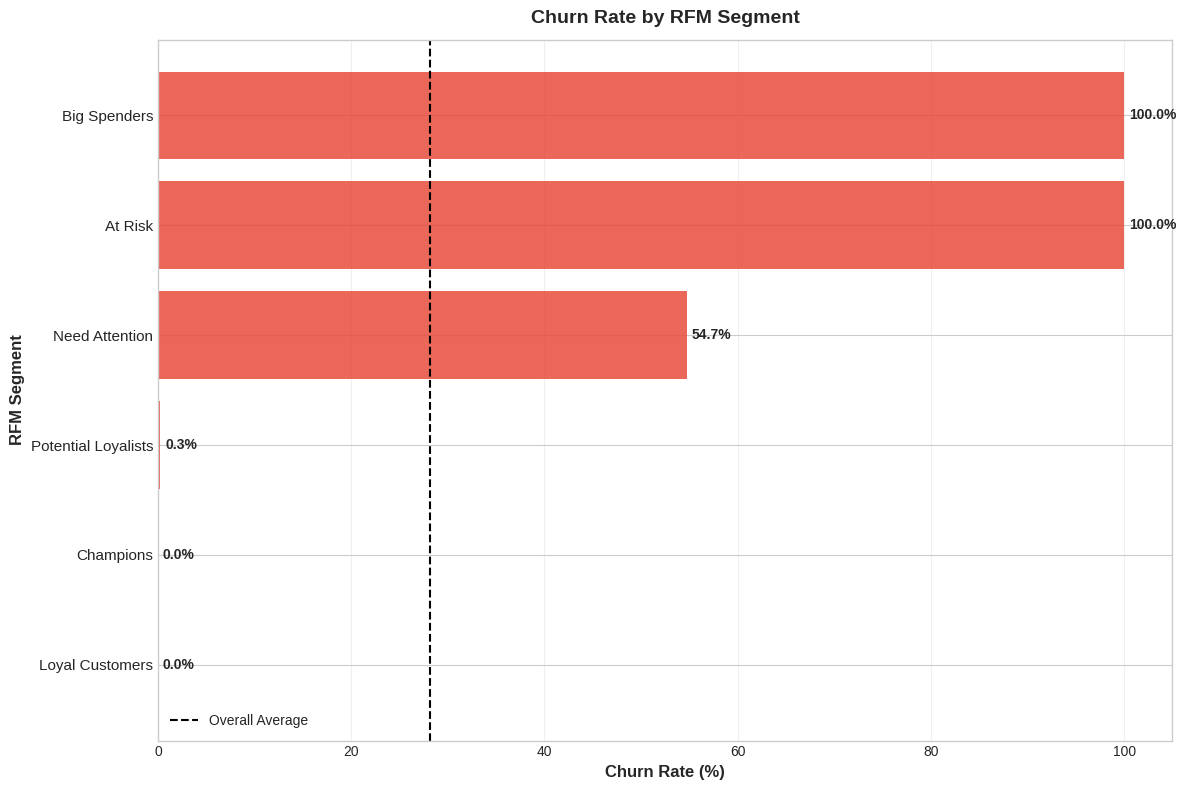

In [144]:
# Chart 12: Churn Rate by RFM Segment (Improved Clarity)
plt.figure(figsize=(12, 8))
ax12 = plt.subplot(1, 1, 1)
rfm_churn = (
    df.groupby('rfm_segment')['churned']
    .mean()
    .sort_values(ascending=True) * 100)
bars = ax12.barh(
    range(len(rfm_churn)),
    rfm_churn,
    color='#e74c3c',
    alpha=0.85)
# Y-axis
ax12.set_yticks(range(len(rfm_churn)))
ax12.set_yticklabels(rfm_churn.index, fontsize=11)
ax12.set_ylabel('RFM Segment', fontsize=12, fontweight='bold')
# X-axis
ax12.set_xlabel('Churn Rate (%)', fontsize=12, fontweight='bold')
# Title
ax12.set_title(
    'Churn Rate by RFM Segment',
    fontsize=14,
    fontweight='bold',
    pad=12)
# Overall churn reference line
ax12.axvline(
    x=churn_rate,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label='Overall Average')
ax12.legend(fontsize=10)
ax12.grid(axis='x', alpha=0.3)
# Value labels
for bar in bars:
    width = bar.get_width()
    ax12.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10,
        fontweight='bold')
plt.tight_layout()
plt.show()


# STEP 6: KEY INSIGHTS & RECOMMENDATIONS

In [175]:
print("-" * 80)
print("KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS (EXECUTIVE SUMMARY)")
print("-" * 80)

# 1. Early-stage churn
print("\n1. EARLY-STAGE CHURN (FIRST 3 MONTHS)")
print("_" * 60)
print(f"• Churn Rate: {early_churn_rate:.1f}%")
print(f"• Contribution to Total Churn: {early_churn_pct:.1f}%")
print(f"• New Customer Churn: {new_customer_churn:.1f}%")
print("Action: Implement a structured 90-day onboarding program")
print("Expected Impact: Reduce early churn to approximately 30%")

# 2. At-risk customers
print("\n2. AT-RISK CUSTOMERS")
print("_" * 60)
print(f"• Customers at Risk: {len(at_risk):,}")
print(f"• Average Inactivity: {at_risk['days_since_last_purchase'].mean():.0f} days")
print(f"• Revenue at Risk: ${at_risk['total_spend'].sum():,.0f}")
print("Action: Launch targeted win-back campaigns")
print("Expected Impact: Recover nearly 30% of at-risk revenue")

# 3. Champions segment
print("\n3. CHAMPIONS (HIGH-VALUE CUSTOMERS)")
print("_" * 60)
print(f"• Customers: {len(champions):,}")
print(f"• Revenue Contribution: {(champions['total_spend'].sum() / total_revenue * 100):.1f}%")
print(f"• Churn Rate: {(champions['churned'].mean() * 100):.1f}%")
print("Action: Introduce a VIP loyalty program")
print("Expected Impact: Increase customer lifetime value by 25%")

# 4. Purchase frequency insight
print("\n4. PURCHASE FREQUENCY IMPACT")
print("_" * 60)
print(f"• High Frequency Customers (6+): {high_freq_churn:.1f}% churn")
print(f"• Low Frequency Customers (1–2): {low_freq_churn:.1f}% churn")
print(f"• Churn Gap: {(low_freq_churn - high_freq_churn):.1f} percentage points")
print("Action: Incentivize repeat purchases")
print("Expected Impact: Meaningful churn reduction through habit formation")

# 5. Category performance
print("\n5. PRODUCT CATEGORY PERFORMANCE")
print("_" * 60)
print(f"• Best Performing Category: {best_category} ({churn_by_category.loc[best_category, 'Churn_Rate']:.1f}% churn)")
print(f"• Underperforming Category: {worst_category} ({churn_by_category.loc[worst_category, 'Churn_Rate']:.1f}% churn)")
print("Action: Strengthen cross-category engagement")
print("Expected Impact: 3–5 percentage point reduction in churn")

print("-" * 80)
print("SUMMARY: Focus on onboarding, retention, loyalty, and purchase frequency programs")
print("-" * 80)


--------------------------------------------------------------------------------
KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS (EXECUTIVE SUMMARY)
--------------------------------------------------------------------------------

1. EARLY-STAGE CHURN (FIRST 3 MONTHS)
____________________________________________________________
• Churn Rate: 41.8%
• Contribution to Total Churn: 56.8%
• New Customer Churn: 43.9%
Action: Implement a structured 90-day onboarding program
Expected Impact: Reduce early churn to approximately 30%

2. AT-RISK CUSTOMERS
____________________________________________________________
• Customers at Risk: 384
• Average Inactivity: 105 days
• Revenue at Risk: $38,367
Action: Launch targeted win-back campaigns
Expected Impact: Recover nearly 30% of at-risk revenue

3. CHAMPIONS (HIGH-VALUE CUSTOMERS)
____________________________________________________________
• Customers: 1,703
• Revenue Contribution: 71.7%
• Churn Rate: 0.0%
Action: Introduce a VIP loyalty program
Expecte

# SAVING ANALYSIS OUTPUTS

In [174]:
print("-" * 80)
print("1. E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS - EXECUTIVE SUMMARY")
print("-" * 80)
print()

print("Analyst: Abhishek Kumar")
print()

print("a. KEY PERFORMANCE INDICATORS")
print("_" * 80)
print(f"Total Customers Analyzed:     {total_customers:,}")
print(f"Overall Churn Rate:           {churn_rate:.1f}%")
print(f"Total Revenue:                ${total_revenue:,.2f}")
print(f"Average Customer Value:       ${avg_customer_value:.2f}")
print(f"Average Tenure:               {avg_tenure:.1f} months")
print()

print("b. TOP 5 CRITICAL FINDINGS")
print("_" * 80)
print(f"1. Early-Stage Churn: {early_churn_rate:.1f}% churn rate in first 3 months")
print(f"2. New Customer Risk: {new_customer_churn:.1f}% of new customers churn")
print(f"3. At-Risk Segment: {len(at_risk):,} customers with "
      f"${at_risk['total_spend'].sum():,.2f} at risk")
print(f"4. Frequency Impact: {(low_freq_churn - high_freq_churn):.1f}pp difference between high/low frequency")
print(f"5. Champions Value: "
      f"{(champions['total_spend'].sum() / total_revenue * 100):.1f}% of revenue "
      f"from {len(champions):,} customers")
print()

print("c. STRATEGIC RECOMMENDATIONS")
print("_" * 80)
print("1. Implement 90-day intensive onboarding program for new customers")
print("2. Launch immediate win-back campaign for at-risk segment")
print("3. Create VIP loyalty program for Champions")
print("4. Deploy frequency incentive programs")
print("5. Develop cross-category engagement strategy")
print()

print("d. PROJECTED BUSINESS IMPACT (90 Days)")
print("_" * 80)
print(f"• Overall churn reduction: {churn_rate:.1f}% → {(churn_rate * 0.75):.1f}% (25% improvement)")
print(f"• Revenue retention: ${(total_revenue * 0.05):,.2f} from reduced churn")
print("• Customer LTV increase: 20–25% for retained customers")
print("• ROI on retention initiatives: Estimated 3–5x")


--------------------------------------------------------------------------------
1. E-COMMERCE CUSTOMER BEHAVIOR ANALYSIS - EXECUTIVE SUMMARY
--------------------------------------------------------------------------------

Analyst: Abhishek Kumar

a. KEY PERFORMANCE INDICATORS
________________________________________________________________________________
Total Customers Analyzed:     5,000
Overall Churn Rate:           28.2%
Total Revenue:                $4,896,182.25
Average Customer Value:       $979.24
Average Tenure:               9.9 months

b. TOP 5 CRITICAL FINDINGS
________________________________________________________________________________
1. Early-Stage Churn: 41.8% churn rate in first 3 months
2. New Customer Risk: 43.9% of new customers churn
3. At-Risk Segment: 384 customers with $38,366.84 at risk
4. Frequency Impact: 25.5pp difference between high/low frequency
5. Champions Value: 71.7% of revenue from 1,703 customers

c. STRATEGIC RECOMMENDATIONS
________________

In [173]:
print("-" * 80)
print("GENERATED DATA OUTPUTS (DISPLAYED BELOW)")
print("-" * 80)

# ---- RFM Segment Analysis ----
print("\n2. RFM SEGMENT ANALYSIS – Detailed RFM Segment Metrics")
print("_" * 80)
print(rfm_analysis)
print("\n")
# ---- Churn Analysis by Customer Type ----
print("\n3. CHURN ANALYSIS BY CUSTOMER TYPE – Churn Breakdown")
print("_" * 80)
print(churn_summary)


--------------------------------------------------------------------------------
GENERATED DATA OUTPUTS (DISPLAYED BELOW)
--------------------------------------------------------------------------------

2. RFM SEGMENT ANALYSIS – Detailed RFM Segment Metrics
________________________________________________________________________________
                     Customer_Count  Churned_Count  Churn_Rate  Total_Revenue  \
rfm_segment                                                                     
At Risk                         384            384       100.0       38366.84   
Big Spenders                    444            444       100.0      620356.24   
Champions                      1703              0         0.0     3509525.57   
Loyal Customers                 631              0         0.0      346462.86   
Need Attention                 1058            579        55.0      195481.52   
Potential Loyalists             780              2         0.0      185989.22   

           